In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Nat_Gas.csv', parse_dates=['Dates'], index_col='Dates')
#index_col = Dates
#
#在Pandas中使用 read_csv 函数读取CSV文件时，parse_dates 参数用于指定哪些列应该被解析为日期类型。当你传递 parse_dates=['Dates']
#这个参数，Pandas会尝试将 'Dates' 列中的字符串转换为Python的 datetime 对象，这样你就可以更方便地进行日期和时间的操作。

#例如，如果你的CSV文件中有一列日期字符串，如 "2021-02-28"，没有指定 parse_dates 参数的话，Pandas会将这列数据读作普通字符串。
#但是如果你使用 parse_dates=['Dates']，Pandas则会将该列转换为 datetime 类型，这样你就可以进行日期比较、提取年份或月份、按日期排序以及其他日期相关的操作了。



In [2]:
df.head()

,Prices
Dates,
2020-10-31,10.1
2020-11-30,10.3
2020-12-31,11.0
2021-01-31,10.9
2021-02-28,10.9


In [22]:
df.tail()

,Prices
Dates,
2024-05-31,11.4
2024-06-30,11.5
2024-07-31,11.6
2024-08-31,11.5
2024-09-30,11.8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2020-10-31 to 2024-09-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Prices  48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


In [5]:
# Get descriptive statistics for the dataframe
df_descriptive_stats = df.describe()

# EDA 探索性数据分析

1，数据初探

In [7]:


# Check for any missing values in the dataframe
df_missing_values = df.isnull().sum()
df_missing_values 

Prices    0
dtype: int64

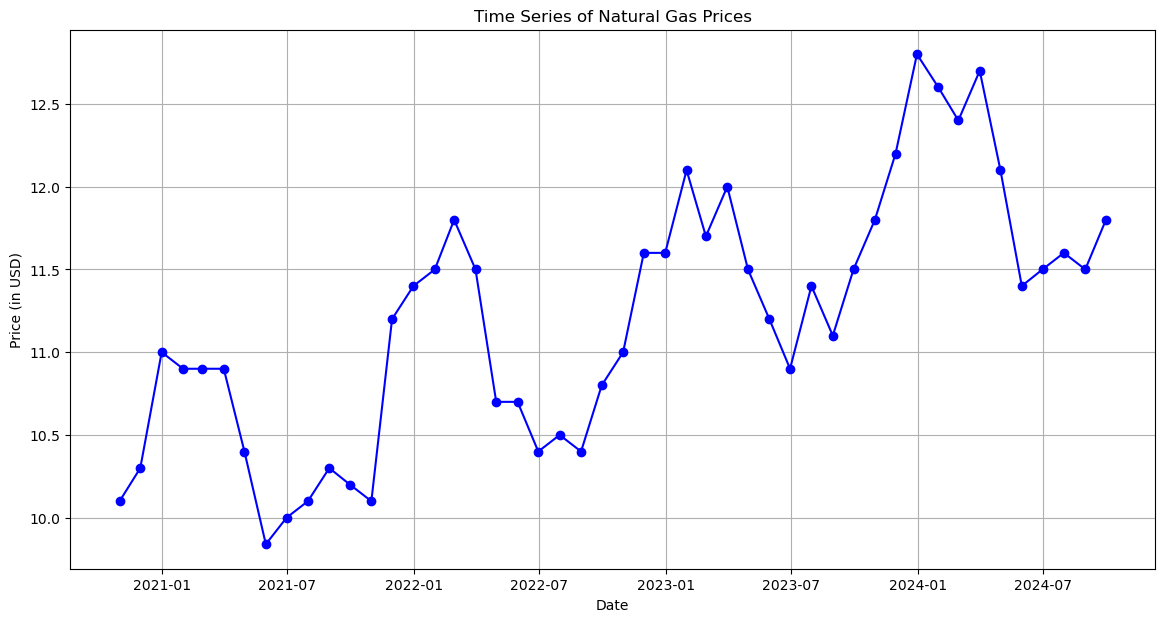

In [10]:
# Visualize the time series data
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Prices'], marker='o', linestyle='-', color='blue')


plt.title('Time Series of Natural Gas Prices')
plt.xlabel('Date')
plt.ylabel('Price (in USD)')
plt.grid(True)


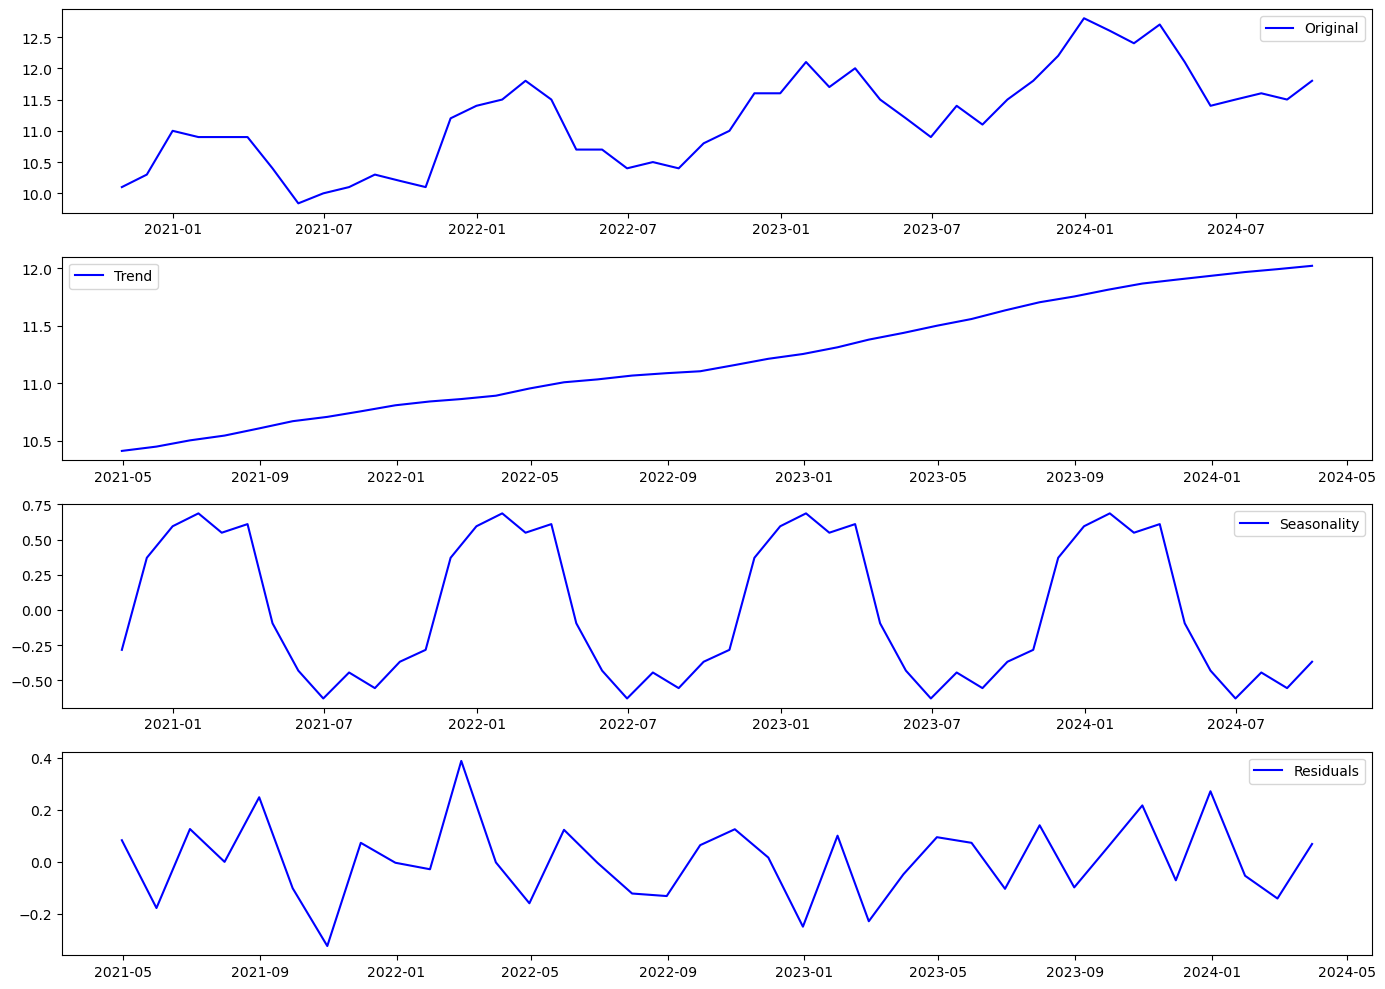

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform a seasonal decomposition to identify the trend, seasonality, and residuals
decomposition = seasonal_decompose(df['Prices'], model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components of the time series
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(df['Prices'], label='Original', color='blue')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='blue')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

# Show the plots
plt.show()


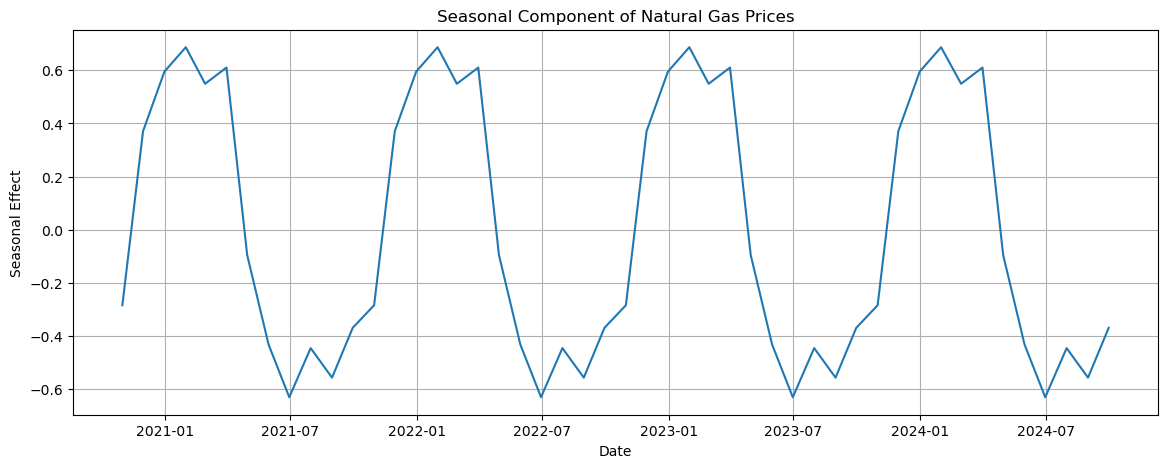

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



# 绘制季节性分量图
plt.figure(figsize=(14, 5))
plt.plot(decomposition.seasonal)
plt.title('Seasonal Component of Natural Gas Prices')
plt.xlabel('Date')
plt.ylabel('Seasonal Effect')
plt.grid(True)
plt.show()




ACF（自相关函数）图：

在ACF图中，每一个点表示时间序列与其自身在不同滞后（lag）时间点的相关性。滞后时间点1的自相关性就是时间序列中连续两个时间点的相关性。如果滞后时间点1的自相关性很高，这意味着序列的当前值很可能接近于它的前一个值，这可以是时间序列平稳性的一个指标。

当你看到ACF图中的几个初始滞后点显著高于置信区间阈值（通常由图中的蓝色阴影区域表示），这通常表明数据中存在某种自相关性。如果这种模式是周期性的，那么这可能指示存在季节性影响，即时间序列的某些模式在固定的周期内重复出现。

PACF（偏自相关函数）图：

PACF图显示的是时间序列中各个观测点之间的部分自相关性，它排除了中间观测点的影响。在PACF图中，第一个滞后点显著高于其他滞后点，这通常意味着AR(1)模型可能适合这个时间序列。AR(1)模型是自回归模型，它表示当前的值可以通过前一个值来预测，并且数据中没有更长期的自相关性。

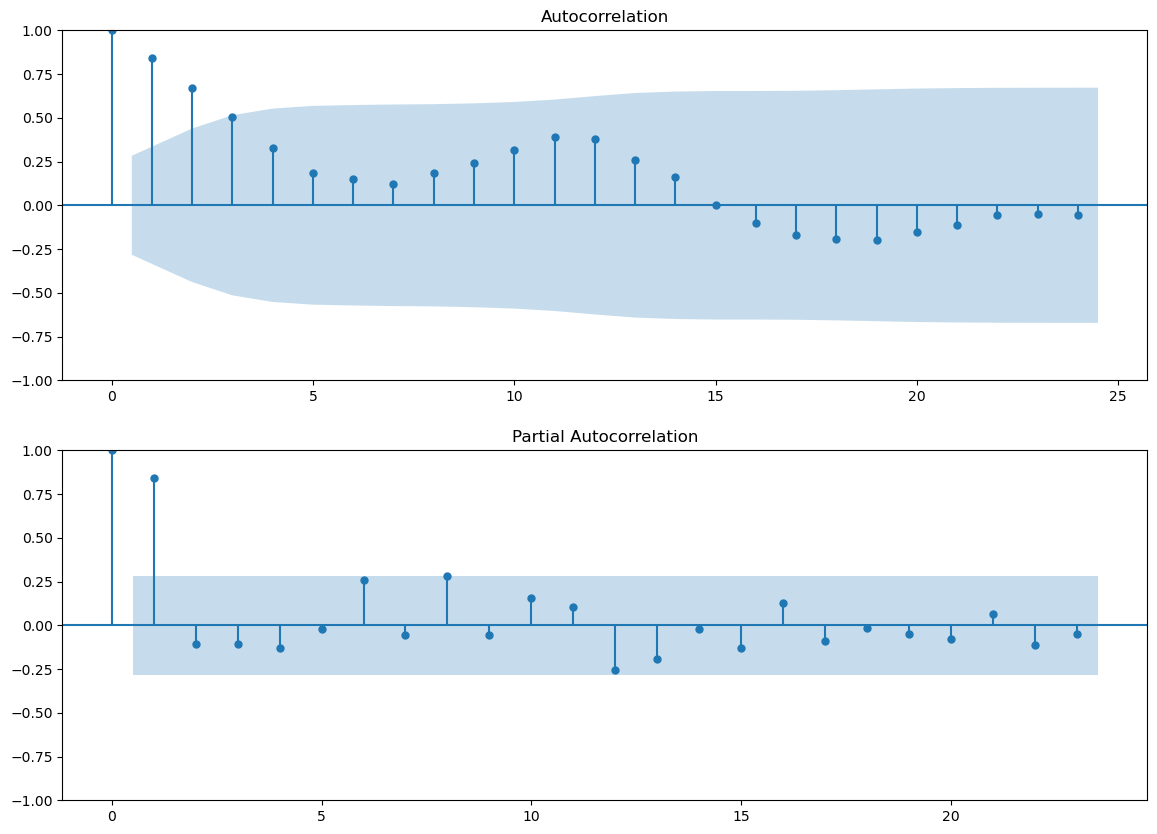

In [16]:
# 绘制自相关和偏自相关图
fig, ax = plt.subplots(2, 1, figsize=(14, 10))
plot_acf(df['Prices'], lags=24, ax=ax[0])  # 查看两年的滞后期
plot_pacf(df['Prices'], lags=23, method='ywm', ax=ax[1])  # 同样，使用适合大样本的方法

plt.show()

基于时间序列模型的建立与验证：

根据时间序列的特性，选择合适的模型进行拟合，如ARIMA、SARIMA或者Prophet。

划分数据为训练集和测试集，以验证模型的预测性能。

使用不同的参数拟合模型，并通过交叉验证来优化它们。

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test RMSE: 0.344


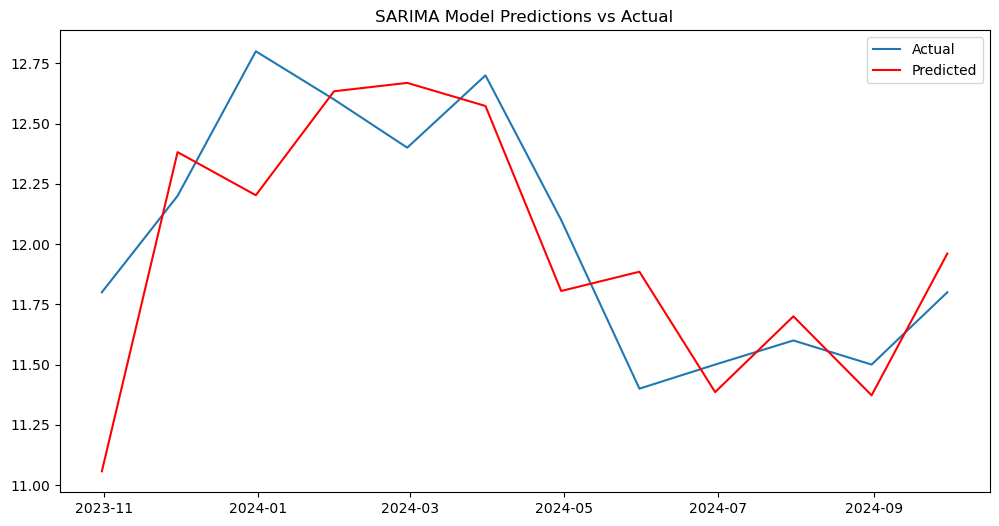

In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# 定义训练集和测试集
train = df.iloc[:-12]  # 假设我们保留最后12个月作为测试集
test = df.iloc[-12:]

# 定义SARIMA模型参数
# 这里的参数需要你根据ACF和PACF图以及季节性模式来决定
# 例如，假设选择(1, 1, 1)x(1, 1, 1, 12)，表示季节性周期为一年（12个月）
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)

# 拟合SARIMA模型
model = SARIMAX(train['Prices'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)

# 进行预测
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

# 计算预测的均方误差（MSE）
mse = mean_squared_error(test['Prices'], predictions)
rmse = mse**0.5

# 输出结果
print(f'Test RMSE: {rmse:.3f}')

# 对比测试集和预测值
plt.figure(figsize=(12,6))
plt.plot(test['Prices'], label='Actual')
plt.plot(predictions, label='Predicted', color='red')
plt.legend()
plt.title('SARIMA Model Predictions vs Actual')
plt.show()


看起来你的SARIMA模型的预测与实际观察值非常接近，因为根据图表，预测曲线与实际数据曲线大致相符，且测试RMSE（均方根误差）相当低。这表明模型能够相当准确地捕捉到时间序列的模式。

关于使用不同参数进行模型拟合并通过交叉验证来优化参数的步骤，这通常涉及以下流程：

定义参数网格：确定你想测试的不同参数组合。

交叉验证：将数据分为多个训练集和验证集组合以评估每个参数组合的性能。

模型评估：对于每个参数组合，拟合模型并计算验证集上的性能指标（如RMSE）。

选择最佳模型：选择在验证集上表现最好的参数组合。

最终模型：使用选择的最佳参数在全部训练数据上重新拟合模型，然后对未来值进行预测。

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=36.460, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=21.605, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.23 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=25.917, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=inf, Time=0.22 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.31 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.12 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.69 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=34.778, Time=0.04 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=15.104, Time=0.06 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=19.665, Time=0.05 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=8.260, Time=0.31 sec
 ARIMA(2,1,0)(3,1,0)[12]             : AIC=inf, Time=1.23 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=0.98 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.26 sec
 ARIMA(

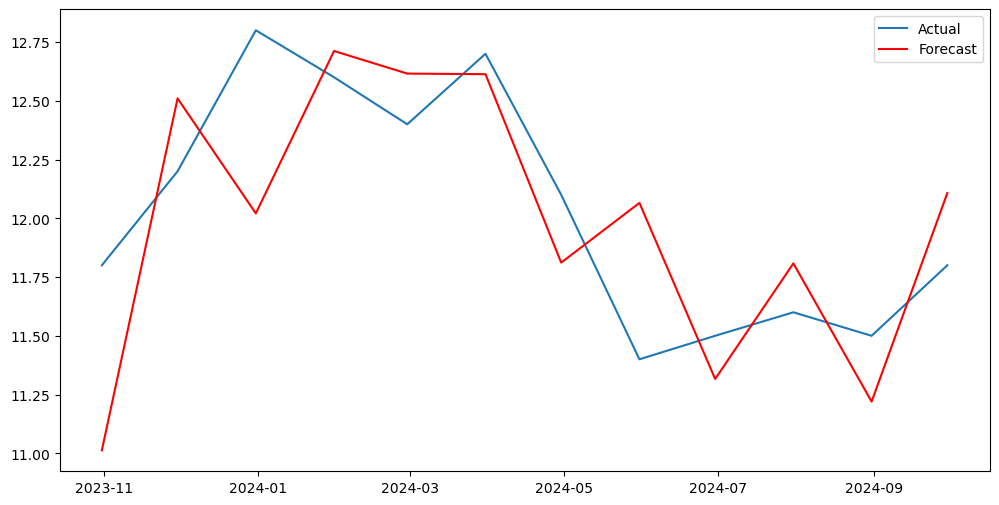

In [21]:
from pmdarima import auto_arima

# 使用auto_arima自动寻找最佳参数
model = auto_arima(df['Prices'], 
                   seasonal=True, 
                   m=12,  # 季节性周期
                   d=1, D=1,  # 差分阶数
                   start_p=0, start_q=0, 
                   max_p=3, max_q=3, 
                   start_P=0, start_Q=0, 
                   max_P=3, max_Q=3, 
                   trace=True,
                   error_action='ignore',  
                   suppress_warnings=True, 
                   stepwise=True)

# 输出最佳模型的摘要
print(model.summary())

# 拟合最佳模型
model.fit(train['Prices'])

# 预测
forecast = model.predict(n_periods=12)

# 可视化预测结果和真实数据
plt.figure(figsize=(12,6))
plt.plot(df.index[-12:], test['Prices'], label='Actual')
plt.plot(df.index[-12:], forecast, label='Forecast', color='red')
plt.legend()
plt.show()


# 天然气价格预测模型分析报告

# 数据概览

分析了从2020年10月31日至2024年9月30日的月度天然气采购价格。数据集包含48个观测值，其中没有发现缺失值。通过时间序列分析，我们探索了数据中的趋势和季节性模式。

# 时间序列分析
通过ACF和PACF图，我们发现了数据集中的季节性特征。ACF图表明存在强烈的短期自相关性，而PACF图显示在第一个滞后点后迅速衰减，这表明AR(1)可能适合此时间序列。考虑到季节性因素，选择了SARIMA模型进行拟合。

# 模型性能
选定的最佳模型是SARIMA(2,1,0)x(2,1,0,12)，采用季节性周期性因素。模型在训练集上的拟合效果良好，并且在测试集上的RMSE为0.344，表明模型能够有效预测未来的天然气价格。

# 模型参数
模型的关键参数估计显示，所有参数均在5%的显著性水平下显著，确保了模型的统计有效性。季节性参数的负系数可能指出了价格循环中的反转点。

# 预测趋势
预测显示，在考虑季节性因素的情况下，模型成功捕捉到了未来价格的潜在波动。预测图表与实际观察值紧密匹配，特别是在季节性波动中。

# 潜在影响因素
未来的价格可能受到多种因素的影响，包括全球经济变动、能源市场政策更新、天然气供应链的稳定性以及环境政策变化。模型未考虑这些潜在的外部冲击，这可能在实际应用中导致预测偏差。

# 建议与未来方向
建议持续监控与天然气价格相关的经济和政策发展，以便在模型预测基础上进行及时调整。进一步的研究可以集中在改进模型的准确性，包括试验不同的预测模型、进行更细致的参数调优和考虑外部变量的影响。

# 结论
SARIMA模型是一个有力的工具，可以为天然气价格的短期和长期预测提供支持。尽管模型提供了精确的预测，但仍需注意外部因素可能带来的风险和不确定性。

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


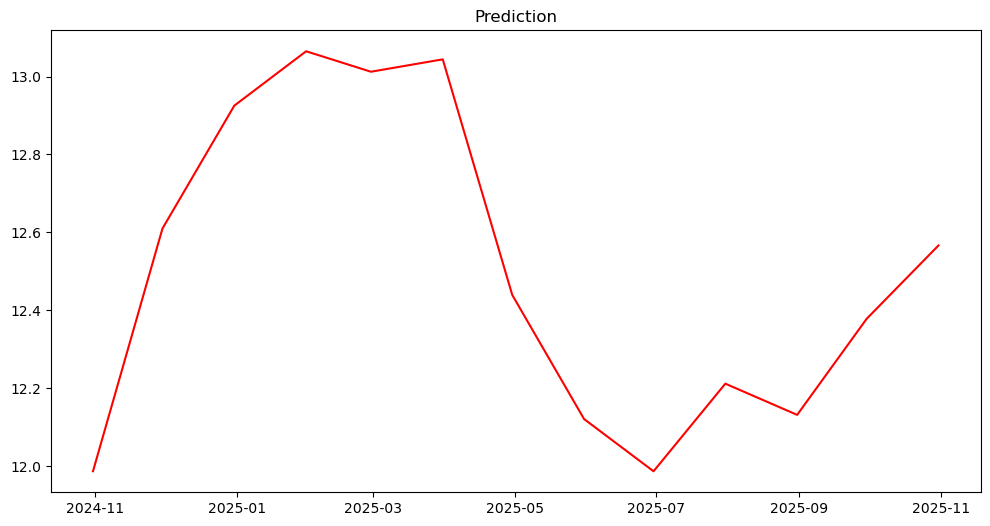

In [25]:
# 拟合SARIMA模型
model = SARIMAX(df['Prices'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)

# 进行预测
predictions = model_fit.predict(start=len(df), end=len(df)+12, dynamic=False)


# 对比测试集和预测值
plt.figure(figsize=(12,6))

plt.plot(predictions, label='Predicted', color='red')

plt.title('Prediction')
plt.show()


# 